In [1]:
import pandas as pd
from matplotlib import pyplot 
import numpy as np
#%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from matplotlib import pyplot 

In [3]:
df = pd.read_csv('msc_data_cleaned_new.csv')
print(df)

        package        product_desc  deducted_amt     dateval  gender age_cat  \
0          MQSM     MobiFunSMS_Quiz          5.51  14/05/2022       0   51-60   
1      CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       1   41-45   
2      CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       0   31-35   
3          MQSM     MobiFunSMS_Quiz          5.51  14/05/2022       1   41-45   
4      CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       1   46-50   
...         ...                 ...           ...         ...     ...     ...   
26275  CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       1   26-30   
26276  CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       1   51-60   
26277  CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       1   51-60   
26278  CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       0   51-60   
26279  CRBT_SRV  crbt_srv_ren_Daily          2.45  14/05/2022       0   26-30   

                 con_age  l

In [4]:
df.keys()

Index(['package', 'product_desc', 'deducted_amt', 'dateval', 'gender',
       'age_cat', 'con_age', 'language_id', 'total_voice_usage_min',
       'total_data_usage_mb', 'device_type', 'total_revenue', 'vas_revenue',
       'customer_id'],
      dtype='object')

In [5]:
df.head()

,package,product_desc,deducted_amt,dateval,gender,age_cat,con_age,language_id,total_voice_usage_min,total_data_usage_mb,device_type,total_revenue,vas_revenue,customer_id
0,MQSM,MobiFunSMS_Quiz,5.51,14/05/2022,0,51-60,7-10 months,2002,76.25,12177.65,SMART,1319.92,226.67,9d7e6ac22a80b2bb8a30c24eb93aa0eb4f4cba87d2e2ac...
1,CRBT_SRV,crbt_srv_ren_Daily,2.45,14/05/2022,1,41-45,1-2 years,2002,227.42,4502.36,NaN,448.00,29.42,e150358611a5ce4b0962f7e93a9e0efac955d49e39a23e...
2,CRBT_SRV,crbt_srv_ren_Daily,2.45,14/05/2022,0,31-35,2-3 years,2078,143.83,7318.22,SMART,1357.65,143.43,96f5ec900c9ce476f57f14b14f63bf29eaeda4c2f7300d...
3,MQSM,MobiFunSMS_Quiz,5.51,14/05/2022,1,41-45,10-12 months,2002,128.55,0.21,SMART,277.25,154.28,df92bbec510185aa72f3a68613e42939a60c734977764b...
4,CRBT_SRV,crbt_srv_ren_Daily,2.45,14/05/2022,1,46-50,1-2 years,2002,15.27,20411.27,SMART,1797.99,190.03,58281aa3e4d09689cae8e476a24915f6f53e71d500f704...


In [6]:
df = df.drop(['customer_id'],axis=1)
df = df.drop(['product_desc'],axis=1)
df = df.drop(['deducted_amt'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
dataTransform = df.copy()
for data in df.columns:
    dataTransform[data] = labelEncoder.fit_transform(df[data])
dataTransform
# dataTransform.drop

,package,dateval,gender,age_cat,con_age,language_id,total_voice_usage_min,total_data_usage_mb,device_type,total_revenue,vas_revenue
0,2,0,0,6,6,0,2259,5927,2,17902,4004
1,1,0,1,4,1,0,6498,4293,3,7071,115
2,1,0,0,2,3,1,4213,5073,2,18077,2002
3,2,0,1,4,2,0,3761,21,2,3341,2241
4,1,0,1,5,1,0,493,6780,2,19618,3083
...,...,...,...,...,...,...,...,...,...,...,...
26275,1,0,1,1,7,1,16035,21,3,11699,2172
26276,1,0,1,6,7,1,6405,0,1,5207,2339
26277,1,0,1,6,7,1,13770,0,0,14349,1378
26278,1,0,0,6,4,0,11774,2009,2,11251,2851


In [8]:
X = dataTransform.drop(['package'],axis=1)

In [9]:
y = dataTransform['package']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.02315
Feature: 2, Score: 0.08192
Feature: 3, Score: 0.03337
Feature: 4, Score: 0.02198
Feature: 5, Score: 0.20408
Feature: 6, Score: 0.09436
Feature: 7, Score: 0.04415
Feature: 8, Score: 0.20779
Feature: 9, Score: 0.28920


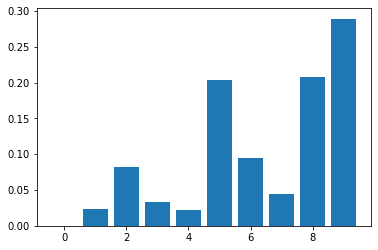

In [12]:
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [13]:
dataTransform.to_excel("cleaned_data4.xlsx")